### CPSC 585 project5
    Name               CWID
    Sicheng Long      887447837
    Malyaj Sirothia   886687508

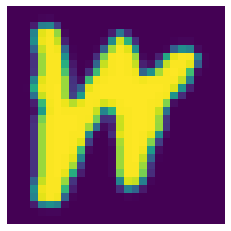

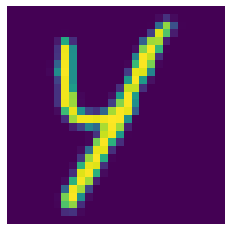

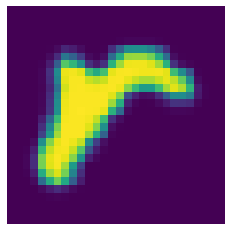

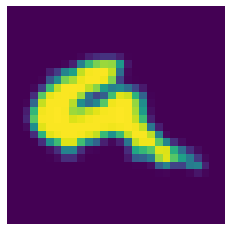

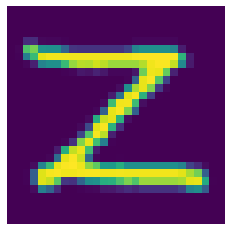

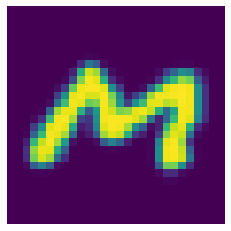

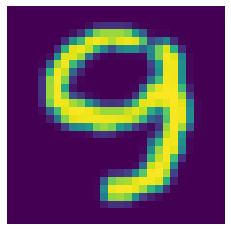

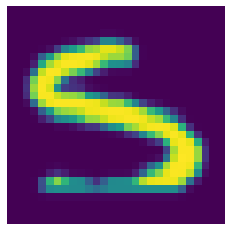

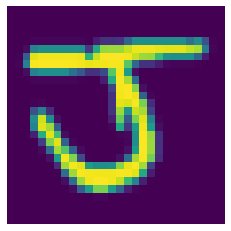

Shape of train set: (104000, 784)
Shape of train label: (104000, 27)
Shape of test set: (20800, 784)
Shape of test label: (20800, 27)
Shape of validate set: (20800, 784)
Shape of validate label: (20800, 27)


In [1]:
'''
Question 1
Load emnist_letters.npz, and output some of the images
'''

import numpy as np
import matplotlib.pyplot as plt

data = np.load('emnist_letters.npz') # load the file from google driver
# 6 sets of the data886687508
test_images = data['test_images']
test_labels = data['test_labels']
train_images = data['train_images']
train_labels = data['train_labels']
validate_images = data['validate_images']
validate_labels = data['validate_labels']

# output 9 images
train1 = np.reshape(train_images[0], (28, 28))
test1 = np.reshape(test_images[0], (28, 28))
validate1 = np.reshape(validate_images[0], (28, 28))
train2 = np.reshape(train_images[103999], (28, 28))
test2 = np.reshape(test_images[20799], (28, 28))
validate2 = np.reshape(validate_images[20799], (28, 28))
train3 = np.reshape(train_images[10000], (28, 28))
test3 = np.reshape(test_images[10000], (28, 28))
validate3 = np.reshape(validate_images[10000], (28, 28))
L = [train1, train2, train3, test1, test2, test3, validate1, validate2, validate3]
for item in L:
  plt.imshow(item) 
  plt.axis('off') 
  plt.show()

# show the shape of every set    
print("Shape of train set:", train_images.shape)
print("Shape of train label:", train_labels.shape)
print("Shape of test set:", test_images.shape)
print("Shape of test label:", test_labels.shape)
print("Shape of validate set:", validate_images.shape)
print("Shape of validate label:", validate_labels.shape)

In [2]:
'''
Question 2
Applying Chollet’s MNIST notebook to the EMNIST Letters data

After applying the same architecture as MNIST to the EMINST letter data we are getting comparetively lesser accuracy.
'''

from keras import models
from keras import layers

train_images = train_images.reshape((104000, 28 * 28))
test_images = test_images.reshape((20800, 28 * 28))
validate_images = validate_images.reshape((20800, 28 * 28))

network1 = models.Sequential()
network1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network1.add(layers.Dense(27, activation='softmax'))


network1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network1.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), epochs=5, batch_size=128)

test_loss, test_acc = network1.evaluate(test_images, test_labels)
validate_loss, validate_acc = network1.evaluate(validate_images, validate_labels)
print('test_acc----->>', test_acc)
print('Validate_acc---------->>', validate_acc)


Epoch 1/5
813/813 [==============================] - 7s 8ms/step - loss: 1.0737 - accuracy: 0.6901 - val_loss: 0.4685 - val_accuracy: 0.8543
Epoch 2/5
813/813 [==============================] - 5s 6ms/step - loss: 0.3963 - accuracy: 0.8767 - val_loss: 0.3692 - val_accuracy: 0.8853
Epoch 3/5
813/813 [==============================] - 5s 7ms/step - loss: 0.3052 - accuracy: 0.9035 - val_loss: 0.3585 - val_accuracy: 0.8881
Epoch 4/5
813/813 [==============================] - 5s 7ms/step - loss: 0.2594 - accuracy: 0.9159 - val_loss: 0.3340 - val_accuracy: 0.8991
Epoch 5/5
650/650 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8935
test_acc----->> 0.8962500095367432
Validate_acc---------->> 0.8935096263885498


In [ ]:
'''
Question 3
Keep the same number of layers in the network
Modify the architecture to improve the accuracy
Name this new model as "network2"

'''

network2 = models.Sequential()
network2.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))  # add more nodes in this hidden layer
network2.add(layers.Dense(27, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# add validation set in the training process
network2 .fit(train_images, train_labels, validation_data=(validate_images,validate_labels), epochs=50, batch_size=128)

Epoch 1/50
813/813 [==============================] - 11s 13ms/step - loss: 0.9467 - accuracy: 0.7200 - val_loss: 0.4410 - val_accuracy: 0.8603
Epoch 2/50
813/813 [==============================] - 10s 13ms/step - loss: 0.3258 - accuracy: 0.8951 - val_loss: 0.3428 - val_accuracy: 0.8962
Epoch 3/50
813/813 [==============================] - 11s 13ms/step - loss: 0.2526 - accuracy: 0.9169 - val_loss: 0.3193 - val_accuracy: 0.9054
Epoch 4/50
813/813 [==============================] - 13s 16ms/step - loss: 0.2051 - accuracy: 0.9305 - val_loss: 0.3260 - val_accuracy: 0.9073
Epoch 5/50
813/813 [==============================] - 11s 13ms/step - loss: 0.1763 - accuracy: 0.9390 - val_loss: 0.3451 - val_accuracy: 0.9008
Epoch 6/50
813/813 [==============================] - 11s 14ms/step - loss: 0.1553 - accuracy: 0.9458 - val_loss: 0.3472 - val_accuracy: 0.9079
Epoch 7/50
813/813 [==============================] - 11s 14ms/step - loss: 0.1428 - accuracy: 0.9502 - val_loss: 0.3607 - val_accuracy:

We test for several values of nodes number in the hidden layer, like 512, 768, 1024, and 2048. We found 2048 might have the best accuracy on validation set.  
In step 3, we set the number of epoch to 50. From the result, we can find that the loss of validation set have the lowest loss value at about epoch 20 to 30, so we can use early stop to upgrade our accuracy. The overall accuray of the validation set is much better than question 2.

In [23]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)

650/650 [==============================] - 1s 2ms/step - loss: 0.9239 - accuracy: 0.9038


The accuracy of test set applying for network2, 90.38%

In [62]:
'''
Question 4
Based on step 3, we make another model "network3".
Trying to get a higher accuracy on validation set of network3
'''

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
#from keras.layers import Dropout

network3 = models.Sequential()
network3.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))  # deleted: , kernel_regularizer=regularizers.l1(l1=1e-5)
#network3.add(Dropout(0.2))
network3.add(layers.Dense(27, activation='softmax'))

best_weights_path = '/content/drive/MyDrive/Colab/best_weights.hdf5'  # the path of storing the best weights
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto') # early stoping, monitoring accuracy on validation set
save_best_model = ModelCheckpoint(best_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto') # save the best model with best weights

network3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), callbacks=[early_stopping, save_best_model], epochs=50, batch_size=128)
network3.load_weights(best_weights_path)

Epoch 1/50
813/813 [==============================] - 4s 4ms/step - loss: 1.2215 - accuracy: 0.7142 - val_loss: 0.6488 - val_accuracy: 0.8650

Epoch 00001: val_accuracy improved from -inf to 0.86500, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 2/50
813/813 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.8856 - val_loss: 0.5757 - val_accuracy: 0.8740

Epoch 00002: val_accuracy improved from 0.86500 to 0.87399, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 3/50
813/813 [==============================] - 3s 3ms/step - loss: 0.4830 - accuracy: 0.9034 - val_loss: 0.5089 - val_accuracy: 0.8963

Epoch 00003: val_accuracy improved from 0.87399 to 0.89625, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 4/50
813/813 [==============================] - 3s 3ms/step - loss: 0.4408 - accuracy: 0.9120 - val_loss: 0.5058 - val_accuracy: 0.8943

Epoch 00004: val_accuracy did not improve from 0.89625
Epoch 5

We use early stop and regulariztion to get a better accuracy. At epoch 15, the model got the best accuracy at 91.077%.  
We also test for several activation functions in the hidden layer, leaky RELU, PRELU, and tanh. The best accuracy on validation set is RELU.  
We also tried Dropout, but could not get a better accuracy.

In [63]:
test_loss, test_acc = network3.evaluate(test_images, test_labels)

650/650 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.9070


There is an improvment about the accuracy on test set, improved about 0.4%.

In [56]:
'''
Question 5
Add additional Dense hidden layers as appropriate to improve the accuracy.
Based on step 4, we make another model "network4".
'''

network4 = models.Sequential()
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(27, activation='softmax'))

best_weights_path = '/content/drive/MyDrive/Colab/best_weights_2.hdf5'  # the path of storing the best weights
early_stopping_2 = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto') # early stoping, monitoring accuracy on validation set
save_best_model_2 = ModelCheckpoint(best_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto') # save the best model with best weights

network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), callbacks=[early_stopping_2, save_best_model_2], epochs=50, batch_size=128)
network4.load_weights(best_weights_path)

Epoch 1/50
813/813 [==============================] - 4s 4ms/step - loss: 1.2877 - accuracy: 0.6957 - val_loss: 0.6488 - val_accuracy: 0.8779

Epoch 00001: val_accuracy improved from -inf to 0.87793, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 2/50
813/813 [==============================] - 3s 4ms/step - loss: 0.5905 - accuracy: 0.8903 - val_loss: 0.5793 - val_accuracy: 0.8885

Epoch 00002: val_accuracy improved from 0.87793 to 0.88846, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 3/50
813/813 [==============================] - 3s 3ms/step - loss: 0.4898 - accuracy: 0.9107 - val_loss: 0.5203 - val_accuracy: 0.9030

Epoch 00003: val_accuracy improved from 0.88846 to 0.90303, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 4/50
813/813 [==============================] - 3s 3ms/step - loss: 0.4309 - accuracy: 0.9186 - val_loss: 0.4891 - val_accuracy: 0.9037

Epoch 00004: val_accuracy improved from 0.90303 to 0.903

We now set 3 hidden layers with each layer has 512 nodes. At epoch 12, the model got the best accuracy at 91.827%. The accuracy improved a little compared with Question 4.

In [57]:
test_loss, test_acc = network4.evaluate(test_images, test_labels)

650/650 [==============================] - 2s 2ms/step - loss: 0.4399 - accuracy: 0.9139


    Question 6
    
    In question 2, we got an accuracy of 89.62%
    In question 3, we got an accuracy of 90.38%
    In question 4, we got an accuracy of 90.70%
    
    this shows that our accuracy increased in experiment 3 and 4 as compared to experiment 2

Wrong predict image 0


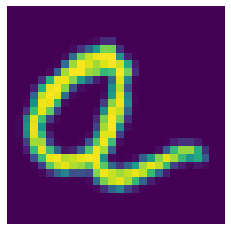

Wrong predict image 1


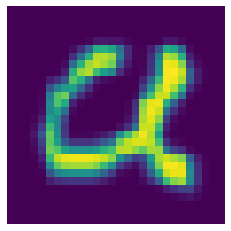

Wrong predict image 2


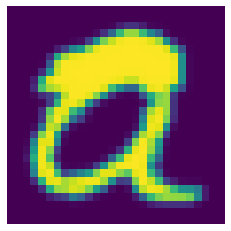

Wrong predict image 3


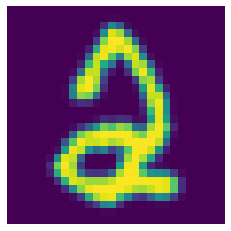

Wrong predict image 4


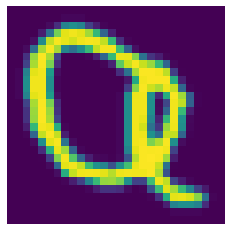

Wrong predict image 5


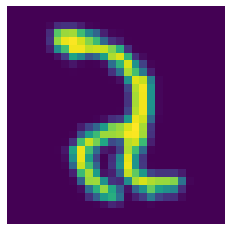

Wrong predict image 6


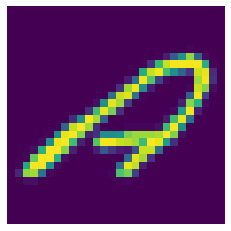

Wrong predict image 7


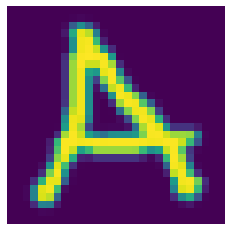

Wrong predict image 8


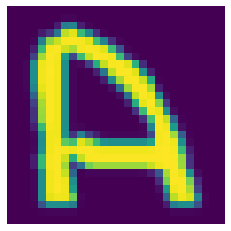

Wrong predict image 9


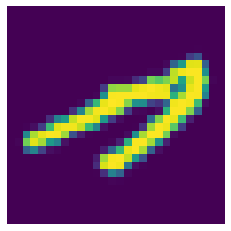

Wrong predict image 10


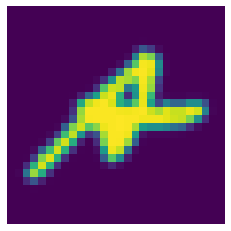

Wrong predict image 11


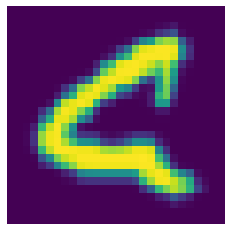

Wrong predict image 12


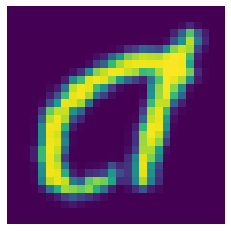

Wrong predict image 13


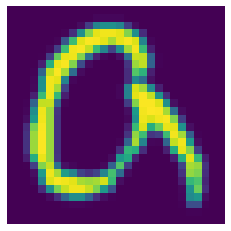

Wrong predict image 14


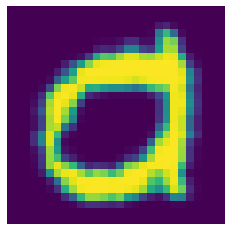

Wrong predict image 15


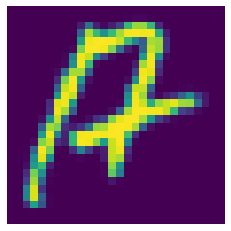

Wrong predict image 16


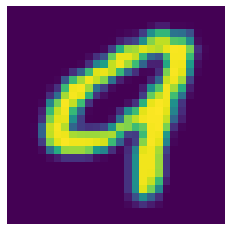

Wrong predict image 17


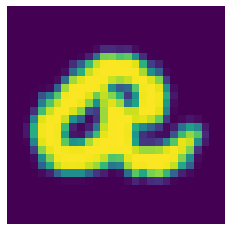

Wrong predict image 18


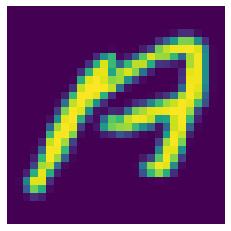

Wrong predict image 19


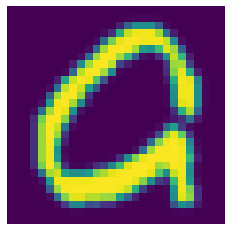

In [74]:
'''
Step 7
Output 20 wrong predict images, and discuss why
'''

pred = network4.predict(test_images)
i = 0
for j in range(len(pred)):
  if np.argmax(pred[j]) != np.argmax(test_labels[j]) and i < 20:
    print("Wrong predict image", i)
    i += 1
    test_image = np.reshape(test_images[j], (28, 28))
    plt.imshow(test_image) 
    plt.axis('off') 
    plt.show()